In [35]:
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
import matplotlib.pyplot as plt

In [8]:
# Data set class for load and preprocessing images

class FaceRecognitionDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = self._get_image_paths()

    def _get_image_paths(self):
        image_paths = []
        for root, dirs, files in os.walk(self.data_dir):
            for file in files:
                if file.endswith('.png') or file.endswith('.jpg'):
                    image_paths.append(os.path.join(root, file))
        return image_paths

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert('RGB')

        if self.transform:
            img = self.transform(img)

        return img, os.path.basename(img_path)


In [48]:
# Example usage

data_dir = '../data/raw/YLFW_bench/data_p2/'  # Update with your data directory

# Define transformations (examples..)
transform = transforms.Compose([
    transforms.Resize((112, 112)),         # Resize images to a fixed size
    transforms.RandomHorizontalFlip(),     # Random horizontal flip for data augmentation
    transforms.RandomRotation(degrees=5),  # Random rotation for pose variation
    transforms.ColorJitter(brightness=0.02, contrast=0.02, saturation=0.2),  # Random brightness, contrast, saturation adjustment
    transforms.GaussianBlur(kernel_size=3),  # Random Gaussian blur
    transforms.ToTensor(),                  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize pixel values
])


dataset = FaceRecognitionDataset(data_dir, transform=transform)

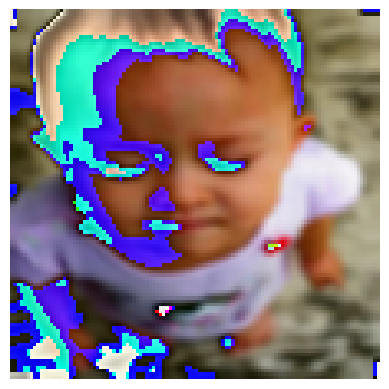

In [49]:
# Access one of the images from the dataset (for example, the first image)
image, label = dataset[1]  # Change the index to access a different image if needed

# Convert the tensor image to a PIL Image
image_pil = transforms.ToPILImage()(image)

# Display the image
plt.imshow(image_pil)
plt.axis('off')
plt.show()

In [32]:
# Data loader ...
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=4)

# Iterate over batches in the dataloader
for batch_idx, (images, image_names) in enumerate(dataloader):
    # Perform inference or training with the batch of images
    # Note: You would typically feed these images into your ArcFace model for training or inference
    print(f'Batch {batch_idx}: {image_names}')


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/gabriellakierulff/anaconda3/envs/best_master/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gabriellakierulff/anaconda3/envs/best_master/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'FaceRecognitionDataset' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/gabriellakierulff/anaconda3/envs/best_master/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gabriellakierulff/anaconda3/envs/best_master/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
   

RuntimeError: DataLoader worker (pid(s) 64143, 64144, 64145, 64146) exited unexpectedly